# RNN Cell Size Analysis

This notebook analyzes the effect of different RNN cell sizes on model performance.

## Import Library

In [15]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, TextVectorization, Embedding
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, f1_score

## Preparation

### Load Data from CSV

In [16]:
train_df = pd.read_csv('../../../data/nusax/train.csv')
valid_df = pd.read_csv('../../../data/nusax/valid.csv')

### Preprocess Data

In [17]:
max_tokens = 5000
max_sequence_length = 54
text_vectorizer = TextVectorization(
    max_tokens=max_tokens,
    output_sequence_length=max_sequence_length,
    standardize='lower_and_strip_punctuation'
)

text_vectorizer.adapt(train_df['text'].values)

label_map = {'positive': 0, 'neutral': 1, 'negative': 2}
train_df['label'] = train_df['label'].map(label_map)
valid_df['label'] = valid_df['label'].map(label_map)

x_train = text_vectorizer(train_df['text'])
y_train = train_df['label']
x_val = text_vectorizer(valid_df['text'])
y_val = valid_df['label']

## Model Training

Variants:
1. 32 Cells per layer
2. 64 Cells per layer
3. 128 Cells per layer

### Variant 1: 32 Cells per layer

In [18]:
model_1 = Sequential([
    Embedding(max_tokens, 100, input_length=max_sequence_length),
    SimpleRNN(32),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

model_1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_1 = model_1.fit(
    x_train, y_train,
    epochs=30,
    batch_size=64,
    validation_data=(x_val, y_val),
)

Epoch 1/30


/Users/maulvizm/Education/Machine Learning/if3270-tubes-2/.venv/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.3640 - loss: 1.1148 - val_accuracy: 0.3800 - val_loss: 1.0852
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4973 - loss: 1.0180 - val_accuracy: 0.4200 - val_loss: 1.0755
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7790 - loss: 0.8404 - val_accuracy: 0.4200 - val_loss: 1.0973
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9540 - loss: 0.5388 - val_accuracy: 0.4200 - val_loss: 1.1139
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9842 - loss: 0.3014 - val_accuracy: 0.3800 - val_loss: 1.1454
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.1796 - val_accuracy: 0.4000 - val_loss: 1.1938
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.1138 - val_accuracy: 0.4300 - val_loss: 1.2418
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0745 - val_accuracy: 0.4300 - val_loss: 1.3029
Epoch 9/30
8/8 ━━

### Variant 2: 64 Cells per layer

In [19]:
model_2 = Sequential([
    Embedding(max_tokens, 100, input_length=max_sequence_length),
    SimpleRNN(64),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

model_2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_2 = model_2.fit(
    x_train, y_train,
    epochs=30,
    batch_size=64,
    validation_data=(x_val, y_val),
)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.3930 - loss: 1.0818 - val_accuracy: 0.5000 - val_loss: 1.0127
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5749 - loss: 0.8940 - val_accuracy: 0.5200 - val_loss: 0.9665
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7381 - loss: 0.6526 - val_accuracy: 0.5500 - val_loss: 1.0045
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8540 - loss: 0.4788 - val_accuracy: 0.6400 - val_loss: 0.8931
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9400 - loss: 0.3178 - val_accuracy: 0.5700 - val_loss: 1.0479
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9952 - loss: 0.1713 - val_accuracy: 0.5900 - val_loss: 0.9856
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9951 - loss: 0.0907 - val_accuracy: 0.5800 - val_loss: 1.1246
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9982 - loss: 0.0535 - val_accuracy: 0.5700 - val_loss: 1.2531
Epoch 

### Varian 3: 128 Cells per layer

In [20]:
model_3 = Sequential([
    Embedding(max_tokens, 100, input_length=max_sequence_length),
    SimpleRNN(128),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

model_3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_3 = model_3.fit(
    x_train, y_train,
    epochs=30,
    batch_size=64,
    validation_data=(x_val, y_val),
)


Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3854 - loss: 1.0847 - val_accuracy: 0.5300 - val_loss: 0.9824
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5521 - loss: 0.9111 - val_accuracy: 0.5400 - val_loss: 0.9186
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7294 - loss: 0.6947 - val_accuracy: 0.5800 - val_loss: 0.8878
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8788 - loss: 0.4404 - val_accuracy: 0.6400 - val_loss: 0.8873
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9355 - loss: 0.2787 - val_accuracy: 0.5900 - val_loss: 0.9867
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9744 - loss: 0.1239 - val_accuracy: 0.5400 - val_loss: 1.2174
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9910 - loss: 0.0719 - val_accuracy: 0.5400 - val_loss: 1.3350
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9982 - loss: 0.0326 - val_accuracy: 0.5900 - val_loss: 1.4154
Epoch 9

## Model Evaluation

In [21]:
def evaluate_model(model, x_val, y_val, history):
    y_pred = model.predict(x_val)
    y_pred_classes = y_pred.argmax(axis=1)
    
    f1 = f1_score(y_val, y_pred_classes, average='macro')
    print(classification_report(y_val, y_pred_classes))
    print(f"Macro F1-score: {f1:.4f}")

    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    return f1

### Evaluate Training Loss and Validation Loss for Each Model

#### Model 1


Evaluating Model 1 (32 cells per layer):
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
              precision    recall  f1-score   support

           0       0.50      0.55      0.53        38
           1       0.37      0.29      0.33        24
           2       0.41      0.42      0.42        38

    accuracy                           0.44       100
   macro avg       0.43      0.42      0.42       100
weighted avg       0.43      0.44      0.44       100

Macro F1-score: 0.4221


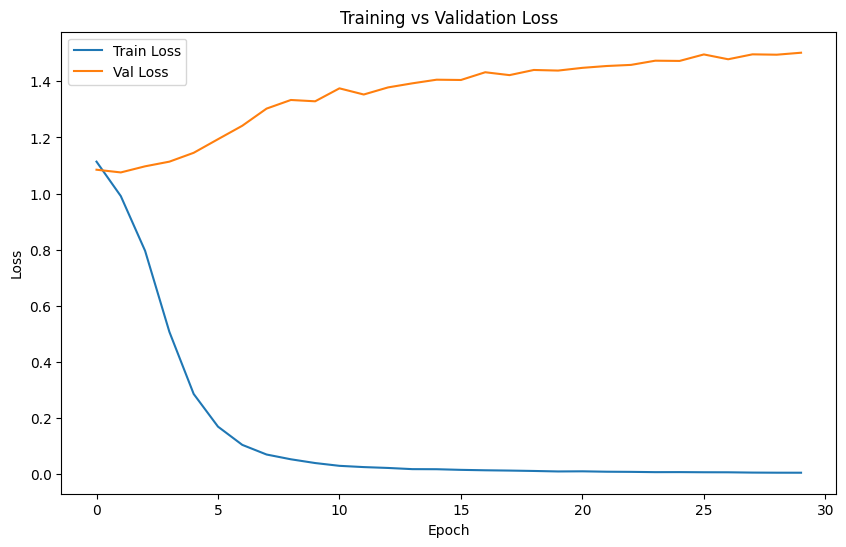

In [22]:
print("\nEvaluating Model 1 (32 cells per layer):")
f1_1 = evaluate_model(model_1, x_val, y_val, history_1)

#### Model 2


Evaluating Model 2 (64 cells per layer):
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
              precision    recall  f1-score   support

           0       0.69      0.58      0.63        38
           1       0.42      0.71      0.53        24
           2       0.68      0.50      0.58        38

    accuracy                           0.58       100
   macro avg       0.60      0.60      0.58       100
weighted avg       0.62      0.58      0.59       100

Macro F1-score: 0.5785


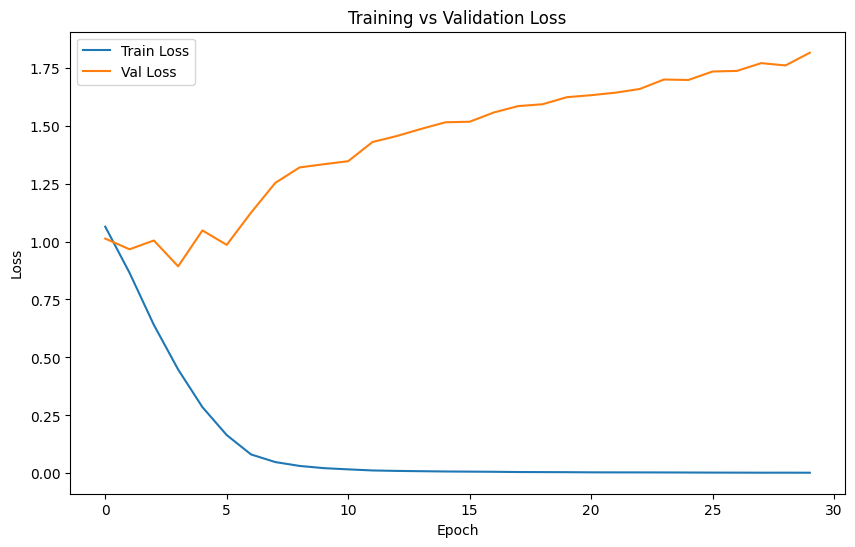

In [23]:
print("\nEvaluating Model 2 (64 cells per layer):")
f1_2 = evaluate_model(model_2, x_val, y_val, history_2)

#### Model 3


Evaluating Model 3 (128 cells per layer):


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
              precision    recall  f1-score   support

           0       0.72      0.76      0.74        38
           1       0.31      0.33      0.32        24
           2       0.56      0.50      0.53        38

    accuracy                           0.56       100
   macro avg       0.53      0.53      0.53       100
weighted avg       0.56      0.56      0.56       100

Macro F1-score: 0.5305


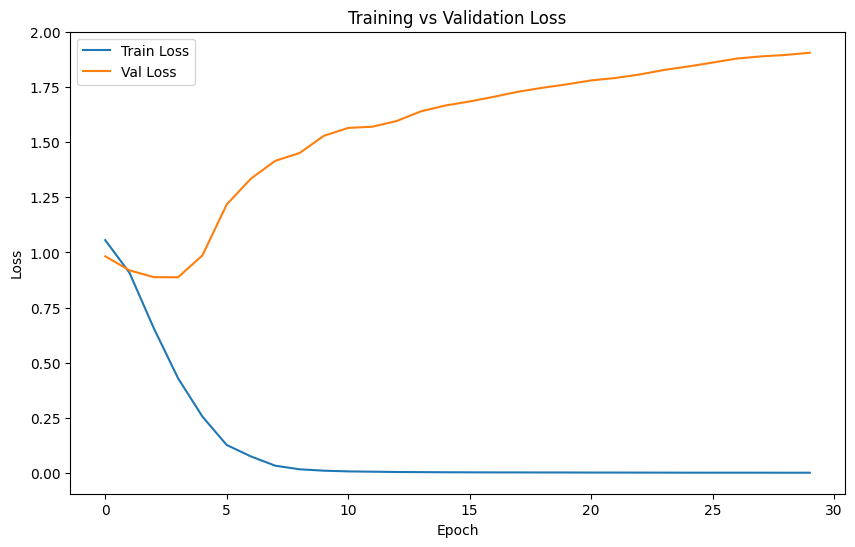

In [24]:
print("\nEvaluating Model 3 (128 cells per layer):")
f1_3 = evaluate_model(model_3, x_val, y_val, history_3)

### Validation Loss Comparison

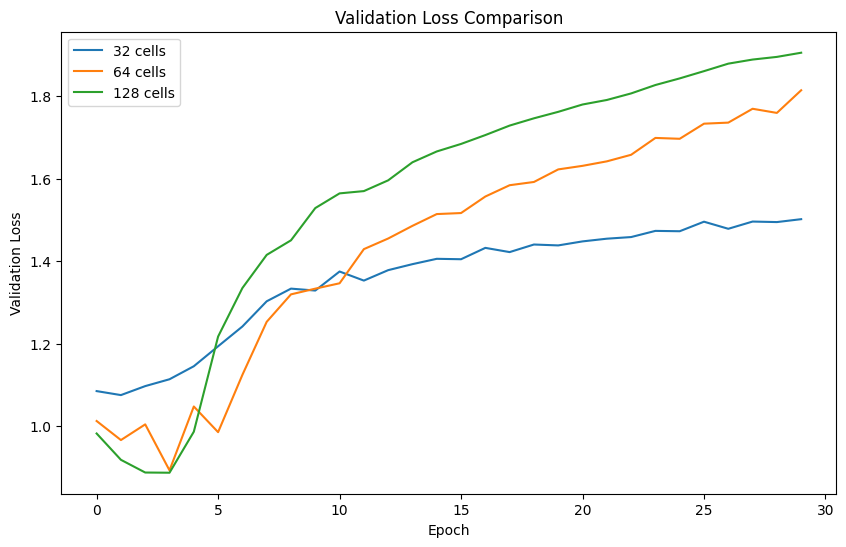

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(history_1.history['val_loss'], label='32 cells')
plt.plot(history_2.history['val_loss'], label='64 cells')
plt.plot(history_3.history['val_loss'], label='128 cells')
plt.title('Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

### Training Loss Comparison

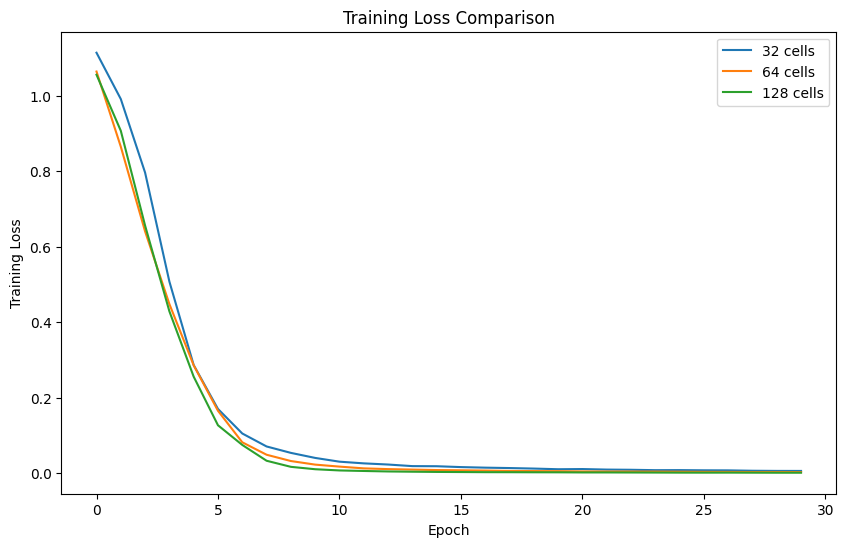

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(history_1.history['loss'], label='32 cells')
plt.plot(history_2.history['loss'], label='64 cells')
plt.plot(history_3.history['loss'], label='128 cells')
plt.title('Training Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

### Accuracy Comparison

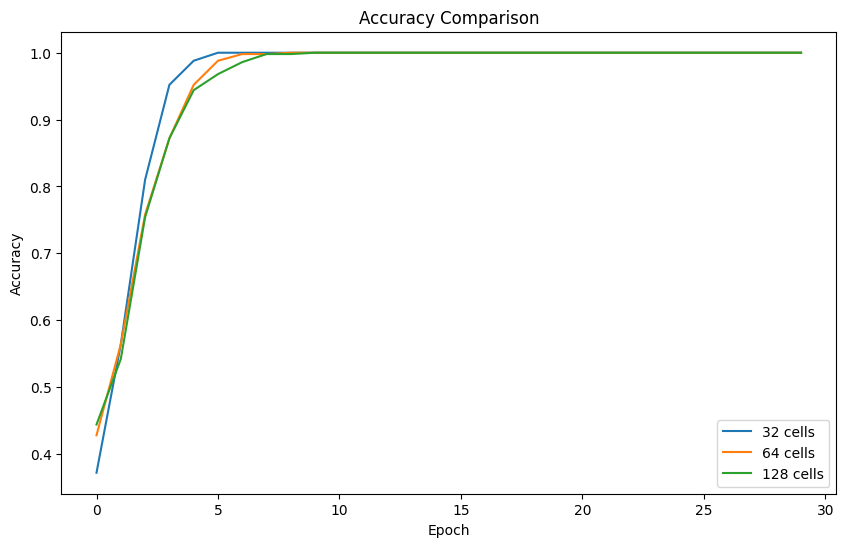

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(history_1.history['accuracy'], label='32 cells')
plt.plot(history_2.history['accuracy'], label='64 cells')
plt.plot(history_3.history['accuracy'], label='128 cells')
plt.title('Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### F1 Score Comparison

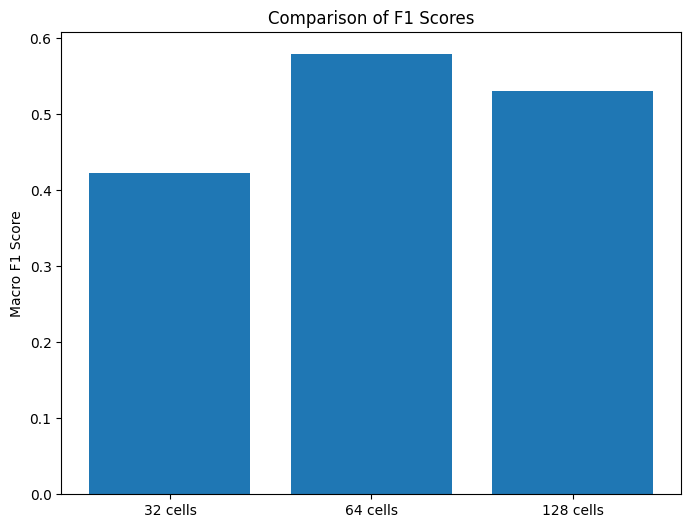

In [28]:
plt.figure(figsize=(8, 6))
plt.bar(['32 cells', '64 cells', '128 cells'], [f1_1, f1_2, f1_3])
plt.title('Comparison of F1 Scores')
plt.ylabel('Macro F1 Score')
plt.show()